<a href="https://colab.research.google.com/github/bkokalari/User-reviews-moderation-with-deep-learning/blob/main/Greek/simple_transformers_greek_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Pre proc

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 2.7MB/s 
     |████████████████████████████████| 7.4MB 8.2MB/s 
     |████████████████████████████████| 1.7MB 42.2MB/s 
     |████████████████████████████████| 1.1MB 42.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 317kB 41.5MB/s 
     |████████████████████████████████| 2.9MB 43.4MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 4.4MB 42.2MB/s 
     |████████████████████████████████| 6.7MB 39.5MB/s 
     |████████████████████████████████| 112kB 37.7MB/s 
     |████████████████████████████████| 133kB 44.5MB/s 
     |████████████████████████████████| 163kB 41.4MB/s 
     |████████████████████████████████| 102kB 11.9MB/s 
     |████████████████████████████████| 122kB 44.4MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 1.1MB 35.3MB/s 
     |████████████████████████████████| 890kB 41.9MB/s 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
revs_preprocessed = pd.read_csv("/content/drive/My Drive/Colab Notebooks/reviews_moderation_v2/data/Greek/augmented_greek.csv") 
revs_preprocessed = revs_preprocessed.dropna()
revs_preprocessed.sample(5)

,review,approved
33702,Εξαιρετικός,1
40994,Συνεπής κ προσιτος,1
107019,"Πολύ προσιτή και φιλική, αξιολόγησε την κατάστ...",1
115915,"Πολυ ευγενικος, απλος και σχολαστικος κατα την...",1
45295,πολύ καλός γιατρός.. σου εμπνέει εμπιστοσύνη α...,1


In [ ]:
revs = revs_preprocessed
revs.approved.value_counts()


1    123116
0      8646
Name: approved, dtype: int64

In [ ]:
import numpy as np
r_train, r_validate, r_test = np.split(revs.sample(frac=1), [int(.6*len(revs)), int(.8*len(revs))])

In [ ]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging
import torch
import sklearn


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Train and Evaluation data needs to be in a Pandas Dataframe of two columns. The first column is the text with type str, and the second column is the label with type int.
train_data = r_train
train_df = pd.DataFrame(train_data)

eval_data = r_validate
eval_df = pd.DataFrame(eval_data)
#model_path = path_root+"savedModel_greekBert"

test_data = r_test
test_df = pd.DataFrame(test_data)

####Args

#Model

## 1 epoch


In [ ]:
# Create a TransformerModel
train_args={
    'overwrite_output_dir': True
}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "nlpaueb/bert-base-greek-uncased-v1",
    args=train_args
)

INFO:filelock:Lock 140157312901072 acquired on /root/.cache/torch/transformers/801403feac021629fe18da08a0acea2f5b2b4e70a7207a59d0e54d039eb5f256.0d654d968826945ca2f440ac5cce4fbb4b14501d55608d43a6fc63eb8c32e0ee.lock


INFO:filelock:Lock 140157312901072 released on /root/.cache/torch/transformers/801403feac021629fe18da08a0acea2f5b2b4e70a7207a59d0e54d039eb5f256.0d654d968826945ca2f440ac5cce4fbb4b14501d55608d43a6fc63eb8c32e0ee.lock


INFO:filelock:Lock 140157312900680 acquired on /root/.cache/torch/transformers/79473d5e24e3dcd27f5cad80c1317e05d5769ce3676b42e552e97a3a4380e1bd.2aad66b9b70b2aa069cb5a695a371c8289c0fc672a34efff6188126824ef3b60.lock


INFO:filelock:Lock 140157312900680 released on /root/.cache/torch/transformers/79473d5e24e3dcd27f5cad80c1317e05d5769ce3676b42e552e97a3a4380e1bd.2aad66b9b70b2aa069cb5a695a371c8289c0fc672a34efff6188126824ef3b60.lock


Some weights of the model checkpoint at nlpaueb/bert-base-greek-uncased-v1 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification 

INFO:filelock:Lock 140157312973232 released on /root/.cache/torch/transformers/d28776688ccba7d216f7799b803b6a72fdca1eaad13b68287e9a59c7716c8765.cc976923a1a174b007c34659c960dbe6903652904012ffab731c0ca1723c3754.lock


INFO:filelock:Lock 140157312973232 acquired on /root/.cache/torch/transformers/34e02f1307a6882ced6661784783594e3ea8b023abaa5feea234072c38683521.275045728fbf41c11d3dae08b8742c054377e18d92cc7b72b6351152a99b64e4.lock


INFO:filelock:Lock 140157312973232 released on /root/.cache/torch/transformers/34e02f1307a6882ced6661784783594e3ea8b023abaa5feea234072c38683521.275045728fbf41c11d3dae08b8742c054377e18d92cc7b72b6351152a99b64e4.lock


INFO:filelock:Lock 140157312973232 acquired on /root/.cache/torch/transformers/ddccea7fe826390cf5e8034987cefd981a111f250dd7ae1cbc8714f00920eea7.3889713104075cfee9e96090bcdd0dc753733b3db9da20d1dd8b2cd1030536a2.lock


INFO:filelock:Lock 140157312973232 released on /root/.cache/torch/transformers/ddccea7fe826390cf5e8034987cefd981a111f250dd7ae1cbc8714f00920eea7.3889713104075cfee9e96090bcdd0dc753733b3db9da20d1dd8b2cd1030536a2.lock


In [ ]:
'''#//default simple transformers params
model.args = {
   'model_type':  'roberta',
   'model_name': 'roberta-base',
   'output_dir': 'outputs/',
   'cache_dir': 'cache/',
   'fp16': True,
   'fp16_opt_level': 'O1',
   'max_seq_length': 128,
   'train_batch_size': 8,
   'eval_batch_size': 8,
   'gradient_accumulation_steps': 1,
   'num_train_epochs': 1,
   'weight_decay': 0,
   'learning_rate': 4e-5,
   'adam_epsilon': 1e-8,
   'warmup_ratio': 0.06,
   'warmup_steps': 0,
   'max_grad_norm': 1.0,
   'logging_steps': 50,
   'evaluate_during_training': False,
   'save_steps': 2000,
   'eval_all_checkpoints': True,
   'use_tensorboard': True,
   'overwrite_output_dir': False,
   'reprocess_input_data': False,
}'''

In [ ]:
model.args

ClassificationArgs(adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=1, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, eval_batch_size=8, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=True, fp16=True, gradient_accumulation_steps=1, learning_rate=4e-05, local_rank=-1, logging_steps=50, manual_seed=None, max_grad_norm=1.0, max_seq_length=128, model_name='nlpaueb/bert-base-greek-uncased-v1', model_type='bert', multiprocessing_chunksize=500, n_gpu=1, no_cache=False, no_save=False, num_train_epochs=1, output_dir='outputs/', overwrite_output_dir=True, process_count=1, quantized_model

In [ ]:
model.model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:

# Train the model
model.train_model(train_df)

torch.save(model, "/content/drive/My Drive/Colab Notebooks/reviews_moderation_v2/data/Greek/tensorflow_saved_models/greek_bert" )

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:353: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


KeyboardInterrupt: ignored

#Predict

##Random manual testing

In [ ]:
predictions, raw_outputs = model.predict(['μεγαλος μαλακας', 'πολυ καλος γιατρός',' δσαφα', ' dfjdnf@fdfg.gr 29954954', 'με χρέωσε 10000 ευρώ για το τιποτα' ])
predictions

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


array([0, 1, 0, 0, 0])

In [ ]:
r_test.head()

,review,approved
11807,Ήταν πολύ φιλική και έκανε πολύ καλή δουλειά. ...,1
102332,"Πέρα από την καθυστέρηση του ραντεβού, που δε...",1
12554,Πολύ καλός γιατρός γνωστής στο αντικείμενο του...,1
63808,"Πάρα πολύ καλός γιατρός με εμπειρία, ήταν αρκ...",1
103179,Φιλικός και προσιτός,1


In [ ]:
r_test.approved.value_counts()

1    24614
0     1739
Name: approved, dtype: int64

In [ ]:
r_test.review.values

array(['Ήταν πολύ φιλική και έκανε πολύ καλή δουλειά. Σίγουρα θα την προτιμήσω ξανά. ',
       'Πέρα από την καθυστέρηση του  ραντεβού, που δεν εξαρτάται πάντα από τη γιατρό, όλα ήταν πολύ καλά. Ήταν κατατοπιστική, αναλυτική, κατανοητή. Έμεινα ικανοποιημένη και θα την επιλέξω σαν μόνιμη ιατρό μου.',
       'Πολύ καλός γιατρός γνωστής στο αντικείμενο του.εμεινα πολύ ικανοποιημενος κ τα αποτελέσματα μετά τον καυτηριασμό που έκανε στην μικρή μου είναι εξαιρετικά.',
       ..., 'Εμεινα ευχαριστημένος και την συνιστώ ανεπιφύλαχτα.',
       'ΚΑΛΗ ΓΙΑΤΡΟΣ',
       'Θα ήθελα να διαθέσει περισσότερο χρόνο για την περίπτωση μου που ήταν σημαντική. Κατά τα άλλα ήταν όλα μια χαρά! '],
      dtype=object)

##Test dataset

In [ ]:
test_df

,review,approved
11807,Ήταν πολύ φιλική και έκανε πολύ καλή δουλειά. ...,1
102332,"Πέρα από την καθυστέρηση του ραντεβού, που δε...",1
12554,Πολύ καλός γιατρός γνωστής στο αντικείμενο του...,1
63808,"Πάρα πολύ καλός γιατρός με εμπειρία, ήταν αρκ...",1
103179,Φιλικός και προσιτός,1
...,...,...
11495,Εξαιρετικός γιατρός που δείχνει ενδιαφέρον για...,1
126450,ΕΑΝ ΣΑΣ ΠΩ ΕΞΑΙΡΕΤΙΚΗ ΕΙΝΑΙ ΠΑΡΑ ΠΑΡΑ ΠΟΛΥ ΛΙΓΟ.,1
17594,Εμεινα ευχαριστημένος και την συνιστώ ανεπιφύλ...,1
63258,ΚΑΛΗ ΓΙΑΤΡΟΣ,1


In [ ]:
y_test = test_df.review.values

predictions2,raw2 = model.predict(y_test)
#predictions2epochs, raw2epochs = model2.predict(y_test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


In [ ]:
y_values = r_test.approved.values
y_values

array([1, 1, 1, ..., 1, 1, 0])

##Results 1 epoch

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [ ]:
conf_mat = confusion_matrix(y_true=y_values,
                            y_pred=predictions2)
conf_mat

array([[  609,  1130],
       [  195, 24419]])

In [ ]:
'''conf_mat = confusion_matrix(y_true=y_values,
                            y_pred=predictions2epochs)
conf_mat'''

'conf_mat = confusion_matrix(y_true=y_values,\n                            y_pred=predictions2epochs)\nconf_mat'

In [ ]:
import matplotlib.pyplot as plt

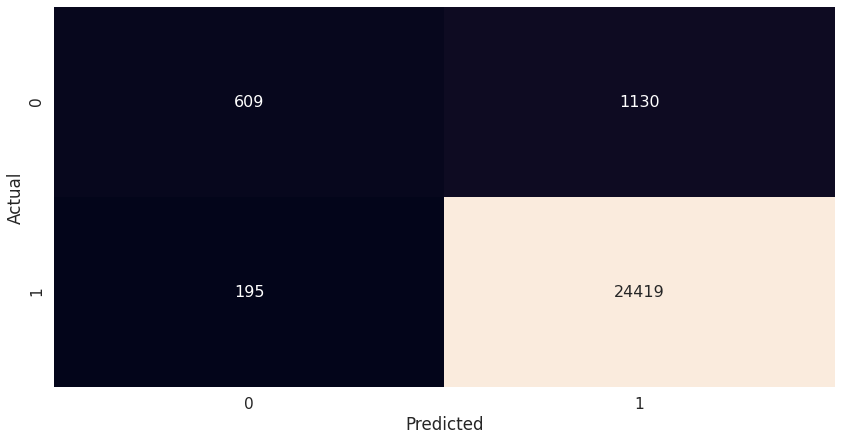

In [ ]:


array_final = conf_mat
x_axis = ['0','1']
cm = pd.DataFrame(array_final)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(14,7))

sns.set(font_scale=1.4)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=x_axis, cbar=False, fmt='d',annot=True, annot_kws={"size":16})

In [ ]:
print(classification_report(y_true=y_values,
                            y_pred=predictions2))

              precision    recall  f1-score   support

           0       0.76      0.35      0.48      1739
           1       0.96      0.99      0.97     24614

    accuracy                           0.95     26353
   macro avg       0.86      0.67      0.73     26353
weighted avg       0.94      0.95      0.94     26353



### Oversampling

##Results 2 epochs

In [ ]:
conf_mat2 = confusion_matrix(y_true=y_values,
                            y_pred=predictions2epochs)
conf_mat2

array([[ 1138,   549],
       [  274, 24354]])

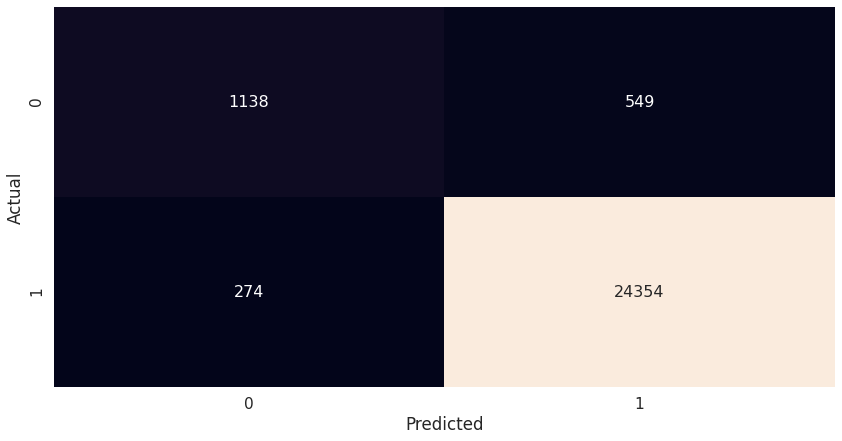

In [ ]:


array_final = conf_mat2
x_axis = ['0','1']
cm = pd.DataFrame(array_final)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(14,7))

sns.set(font_scale=1.4)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=x_axis, cbar=False, fmt='d',annot=True, annot_kws={"size":16})

In [ ]:

print(classification_report(y_true=y_values,
                            y_pred=predictions2epochs))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1687
           1       0.98      0.99      0.98     24628

    accuracy                           0.97     26315
   macro avg       0.89      0.83      0.86     26315
weighted avg       0.97      0.97      0.97     26315

